In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   time_to_collect           1000 non-null   int64  
 2   avg_bill_methods          1000 non-null   object 
 3   debtor_volume_handled     1000 non-null   int64  
 4   bill_amount_collected     1000 non-null   int64  
 5   total_actual              1000 non-null   int64  
 6   total_cost                1000 non-null   int64  
 7   success_rate              1000 non-null   float64
 8   collector_age             1000 non-null   int64  
 9   collector_marital_status  1000 non-null   object 
 10  collector_gender          1000 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender
0,0,sms or WA,7,14400000,35700000,277706,40.0,45,Menikah,laki-laki
1,11,panggilan,35,79000000,160500000,22382611,49.0,32,Cerai mati,perempuan
2,4,sms or WA,6,7100000,26700000,205389,27.0,62,Cerai hidup,laki-laki
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,55,Cerai mati,perempuan
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0,53,Menikah,perempuan


In [5]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual", "total_cost"]])
df2[["bill_amount_collected", "total_actual", "total_cost"]] = scaler.transform(df[["bill_amount_collected", "total_actual", "total_cost"]])
df2[["debtor_volume_handled", "collector_age", "success_rate"]] = df[["debtor_volume_handled", "collector_age", "success_rate"]]
y = df["time_to_collect"]

df2.head(5)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,avg_bill_methods,collector_gender,collector_marital_status,bill_amount_collected,total_actual,total_cost,debtor_volume_handled,collector_age,success_rate
0,2,0,3,-0.459398,-0.520698,-0.252668,7,45,40.0
1,1,1,2,-0.282327,-0.344973,-0.162494,35,32,49.0
2,2,0,1,-0.479408,-0.533371,-0.252963,6,62,27.0
3,0,1,2,1.644624,1.393270,1.716301,63,55,56.0
4,0,1,3,0.449531,0.112644,0.362330,35,53,71.0


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [7]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.04
      Mean Absolute Error : 2.33
      Mean Absolute Percentage Error : 228744715827675.88
      Root Mean Squared Error : 228744715827675.88
      R_Squared : 0.88
      


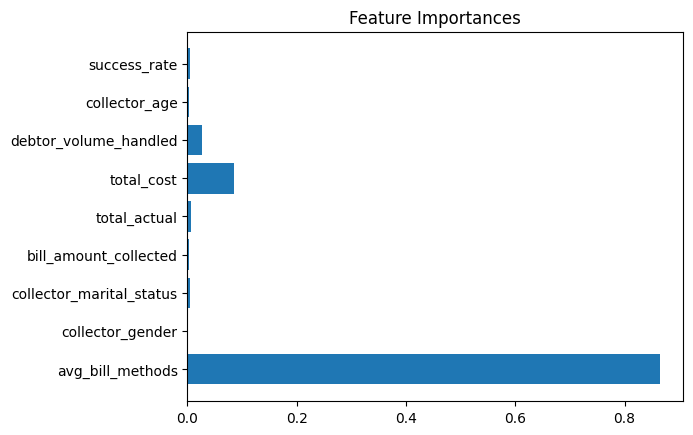

In [9]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.show()

In [10]:
model = AdaBoostRegressor(DecisionTreeRegressor())
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor())

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 11.15
      Mean Absolute Error : 2.56
      Mean Absolute Percentage Error : 202661983231672.53
      Root Mean Squared Error : 202661983231672.53
      R_Squared : 0.85
      


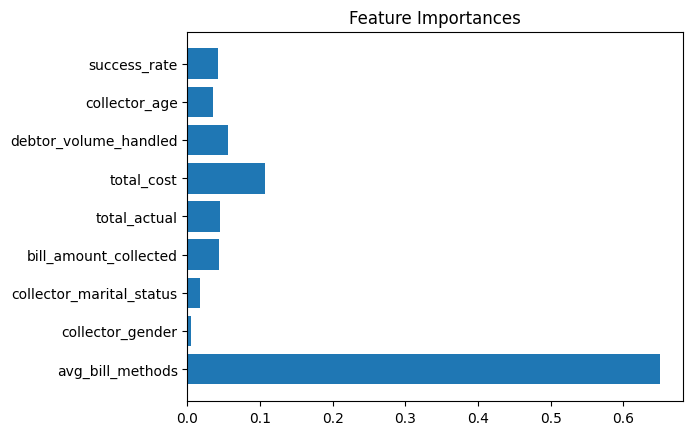

In [12]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.show()

In [13]:
import pickle

pickle.dump(model, open("adaboost.pkl", "wb"))

In [14]:
df3 = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   time_to_collect           1000 non-null   int64  
 2   avg_bill_methods          1000 non-null   object 
 3   debtor_volume_handled     1000 non-null   int64  
 4   bill_amount_collected     1000 non-null   int64  
 5   total_actual              1000 non-null   int64  
 6   total_cost                1000 non-null   int64  
 7   success_rate              1000 non-null   float64
 8   collector_age             1000 non-null   int64  
 9   collector_marital_status  1000 non-null   object 
 10  collector_gender          1000 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [15]:
negotiation_skills = []
collector_experience = []
for i in range(len(df3)):
    if df3.loc[i, "success_rate"] >= 60 and df3.loc[i, "debtor_volume_handled"] >= 15 and df3.loc[i, "time_to_collect"] <= 15:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif df3.loc[i, "success_rate"] >= 60 and df3.loc[i, "debtor_volume_handled"] >= 15 and df3.loc[i, "time_to_collect"] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df3.loc[i, "success_rate"] >= 60 and df3.loc[i, "debtor_volume_handled"] < 15 and df3.loc[i, "time_to_collect"] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif df3.loc[i, "success_rate"] >= 40 and df3.loc[i, "debtor_volume_handled"] < 15 and df3.loc[i, "time_to_collect"] > 10:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df3.loc[i, "success_rate"] >= 40 and df3.loc[i, "debtor_volume_handled"] >= 15 and df3.loc[i, "time_to_collect"] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df3.loc[i, "success_rate"] >= 40 and df3.loc[i, "debtor_volume_handled"] < 15 and df3.loc[i, "time_to_collect"] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    else:
        collector_experience.append(np.random.randint(0, 1))
        negotiation_skills.append("Buruk")

df3["negotiation_skills"] = negotiation_skills
df3["collector_experience"] = collector_experience
df3.head()

,Unnamed: 0,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender,negotiation_skills,collector_experience
0,0,0,sms or WA,7,14400000,35700000,277706,40.0,45,Menikah,laki-laki,Baik,4
1,1,11,panggilan,35,79000000,160500000,22382611,49.0,32,Cerai mati,perempuan,Buruk,0
2,2,4,sms or WA,6,7100000,26700000,205389,27.0,62,Cerai hidup,laki-laki,Buruk,0
3,3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,55,Cerai mati,perempuan,Cukup baik,2
4,4,22,datang ke tempat,35,346000000,485500000,151035603,71.0,53,Menikah,perempuan,Cukup baik,2


In [16]:
for i in df3.columns:
    if df3[i].dtype == "object":
        df3[i] = df3[i].astype("category")

df3.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
df3.to_csv("./data/kolektor.csv")

In [18]:

bill_methods = LabelEncoder().fit(df3["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df3["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df3["collector_marital_status"].to_numpy().reshape(-1, 1))
nego = LabelEncoder().fit(df3["negotiation_skills"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df3["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df3["collector_gender"])
df2["collector_marital_status"] = mart.transform(df3["collector_marital_status"])
df2["negotiation_skills"] = nego.transform(df3["negotiation_skills"])

scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual", "total_cost"]])
df2[["bill_amount_collected", "total_actual", "total_cost"]] = scaler.transform(df3[["bill_amount_collected", "total_actual", "total_cost"]])
df2[["debtor_volume_handled", "collector_age", "success_rate", "collector_experience"]] = df3[["debtor_volume_handled", "collector_age", "success_rate", "collector_experience"]]
y = df3["time_to_collect"]

df3.head(5)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\prepr

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender,negotiation_skills,collector_experience
0,0,sms or WA,7,14400000,35700000,277706,40.0,45,Menikah,laki-laki,Baik,4
1,11,panggilan,35,79000000,160500000,22382611,49.0,32,Cerai mati,perempuan,Buruk,0
2,4,sms or WA,6,7100000,26700000,205389,27.0,62,Cerai hidup,laki-laki,Buruk,0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,55,Cerai mati,perempuan,Cukup baik,2
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0,53,Menikah,perempuan,Cukup baik,2


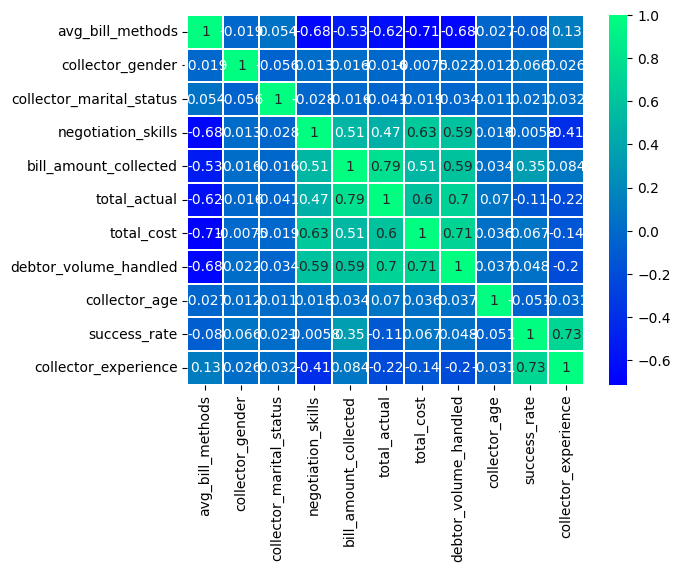

In [19]:
sns.heatmap(df2.corr(), annot=True, linecolor="white", linewidths=.2, cmap="winter")
plt.show()

In [20]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [21]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 8.87
      Mean Absolute Error : 2.32
      Mean Absolute Percentage Error : 205635138829828.31
      Root Mean Squared Error : 205635138829828.31
      R_Squared : 0.88
      
